<IPython.core.display.Javascript object>


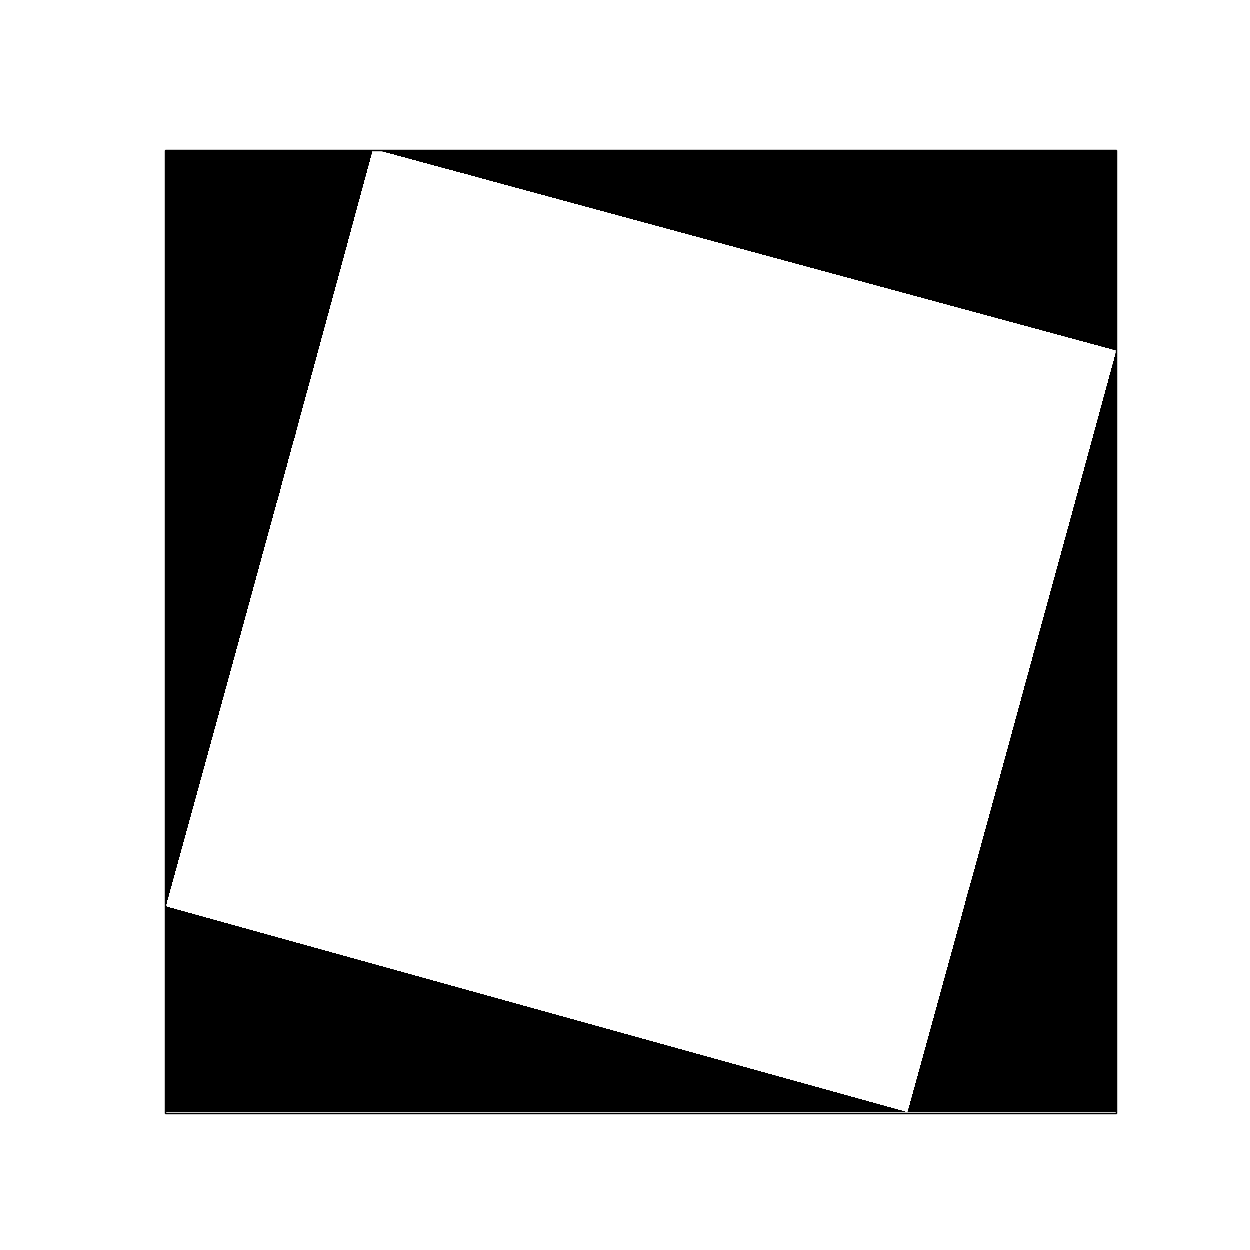

In [5]:
###This is a script designed to take an image from the Landsat 8 collection and run an NDVI on it. 
###To start, head over to the USGS portal and pick your Landsat 8 image, and download it. Make sure you have the seperate bands!



%matplotlib notebook

import numpy as np
import rasterio as rio
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

###Open your image and check the CRS to ensure it is in the desired projection
with rio.open('Image/test.tif') as dataset:
    img = dataset.read()
    xmin, ymin, xmax, ymax = dataset.bounds


###Create a an axis for plotting. 
plotCRS = ccrs.UTM(29) # make sure that this UTM(x) corresponds to the CRS printed above
fig, ax = plt.subplots(1, 1, figsize = (10, 10), subplot_kw=dict(projection=plotCRS)) #HUGH CHANGE SOME PARAMETERS DON'T JUST COPY

#and plot
ax.imshow(img[0], cmap='gray', vmin=200, vmax=500)

